In [10]:
##Python - Load packages
!pip install nfl_data_py
import pandas as pd
import numpy as np
import nfl_data_py as nfl

In [11]:
#Import NFL data for the year 2016-2022
seasons = range(2016, 2022 + 1)
pbp_py = nfl.import_pbp_data(seasons)

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
Downcasting floats.


In [12]:
#Create criteria filter
pbp_py_p = \
pbp_py\
.query("play_type == 'pass' & air_yards.notnull()")\
.reset_index()


In [17]:
#Replace missing values
pbp_py_p["pass_length_air_yards"] = np.where(
    pbp_py_p["air_yards"] >= 20, "long", "short"
)

In [16]:
#Examine basic number
pbp_py_p["passing_yards"]\
.describe()

count    84463.000000
mean        11.206387
std         10.031235
min        -20.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         98.000000
Name: passing_yards, dtype: float64

In [15]:
#Filter out short passes
pbp_py_p\
.query('pass_length_air_yards == "short"')['passing_yards']\
.describe()

count    78893.000000
mean         9.603868
std          7.591037
min        -20.000000
25%          5.000000
50%          8.000000
75%         13.000000
max         95.000000
Name: passing_yards, dtype: float64

In [18]:
#Filter out long passes
pbp_py_p\
.query('pass_length_air_yards == "long"')['passing_yards']\
.describe()

count    5570.000000
mean       33.904308
std        12.575818
min        10.000000
25%        24.250000
50%        30.000000
75%        40.000000
max        98.000000
Name: passing_yards, dtype: float64

In [19]:
#Expected Points Added (EPA) Analysis - Short Passes
pbp_py_p\
.query('pass_length_air_yards == "short"')['epa']\
.describe()

count    116086.000000
mean          0.119606
std           1.426238
min         -13.031219
25%          -0.606135
50%          -0.002100
75%           0.959107
max           8.241420
Name: epa, dtype: float64

In [20]:

#Expected Points Added (EPA) Analysis - Long Passes
pbp_py_p\
.query('pass_length_air_yards == "long"')['passing_yards']\
.describe()


count    5570.000000
mean       33.904308
std        12.575818
min        10.000000
25%        24.250000
50%        30.000000
75%        40.000000
max        98.000000
Name: passing_yards, dtype: float64

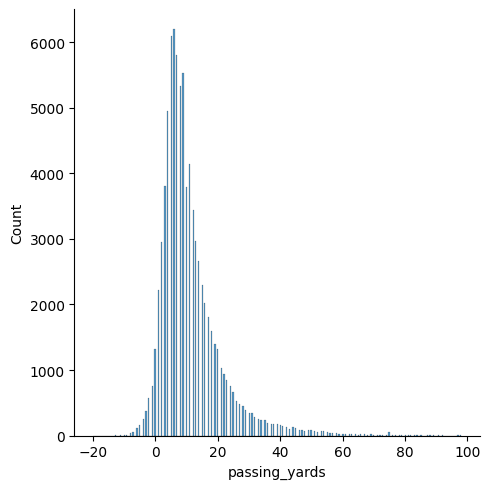

In [21]:
#A histogram using Seaborn for passing_yards
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=pbp_py, x="passing_yards");
plt.show()


In [23]:
sns.set_theme(style="whitegrid", palette="colorblind")

In [24]:
#Filter out the short passes
pbp_py_p_short = \
pbp_py_p\
.query('pass_length_air_yards == "short"')

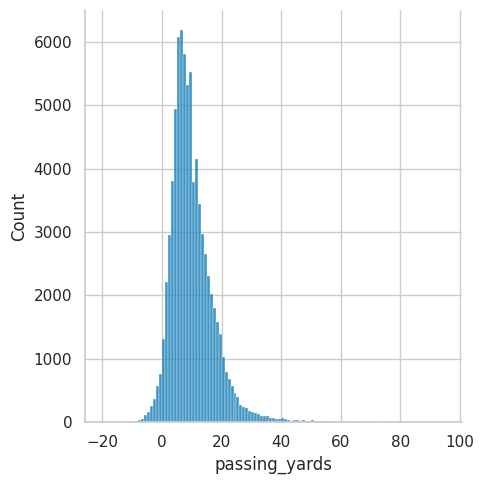

In [25]:
#Plot, change labels, and show the output
pbp_py_p_short = \
sns.displot(data=pbp_py_p_short,
            binwidth=1,
            x="passing_yards");

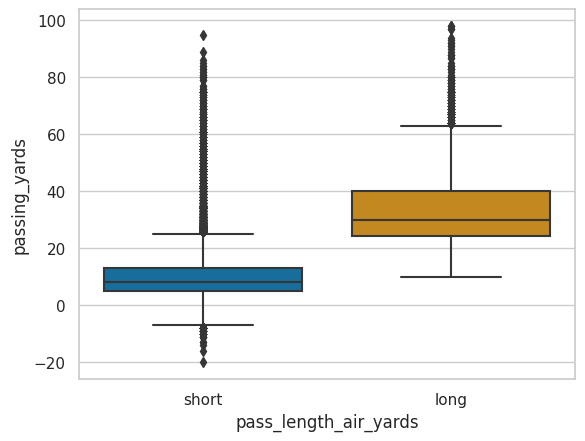

In [26]:
#Plot, change labels, and show the output
pass_boxplot = \
sns.boxplot(data=pbp_py_p,
            x="pass_length_air_yards",
            y="passing_yards");